In [1]:
%load_ext autoreload
%autoreload 2

import sys 
import os 

home = os.path.join('..','..')

pths = [os.path.join(home, 'pml')]

for pth in pths: 
    if pth not in sys.path: sys.path.insert(0, pth)
        
from pml.utils import *
from pml.shapedataframe import ShapeDataFrame
import pml.camera4 as cam 
from pml.matrix_utils2 import MatrixUtils2 as mu
import pml.feature as af 

from ladybug_geometry.geometry2d.line import LineSegment2D

import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

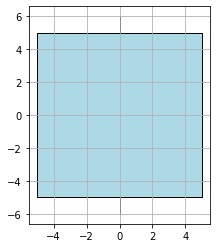

In [6]:
# Make test surfaces 
horsrf = af.gen_floor_mtx(1, 0, area=100, dim=10)
versrf1 = np.array(
    [[-3, 0, 0], [3, 0, 0], [3, 0, 6], [-3, 0, 6]])
versrf2 = np.array(
    [[0, -6, 0], [0, 6, 0], [0, 6, 6], [0, -6, 6]])

srfs = [versrf1, versrf2, horsrf]
a = af.plot(srfs)
a.grid(True)

In [3]:
# Make extrinsic matrix
heading = 45
pitch = 15
cam_posn = np.array([0, -10, 5])

# Make extrinsic matrix = Rt
heading = heading / 180.0 * np.pi
pitch = pitch / 180.0 * np.pi
Rt = cam.extrinsic_matrix(heading, pitch, cam_posn)

# Multiply w/ world 2 camera matrix = Rt
w2c = cam.world_to_camera_matrix()
Rtc = np.matmul(w2c, Rt)

fov = 55 / 180.0 * np.pi
# K = np.eye(4)
# K[:3, :4] = cam.intrinsic_matrix(fov)
K = cam.intrinsic_matrix(fov)
P = np.matmul(K, Rtc)

In [4]:
pts1 = [np.array([
    [-5, 0, 0],
    [-5, 5, 0]])]
pts2 = [np.array([
    [5, 0, 0],
    [5, 5, 0]])]
pts3 = [np.array([
    [0, 0, 0],
    [0, 5, 0]])]

xpts1 = cam.project(P, pts1)
xpts2 = cam.project(P, pts2)
xpts3 = cam.project(P, pts3)

segs = [xpts1, xpts2, xpts3]
segs = [LineSegment2D.from_array(seg[0]) for seg in segs]

# Plot
a = af.plot(None, segs)
a.grid(True)

TypeError: project() missing 1 required positional argument: 'geometries'

In [8]:
# Make test surfaces 
horsrf1 = np.array(
    [[-5, -5, 0], [5, -5, 0], [5, 5, 0], [-5, 5, 0]])
versrf1 = np.array(
    [[-3, 0, 0], [3, 0, 0], [3, 0, 6], [0, 0, 9], [-3, 0, 6]])
versrf2 = np.array(
    [[-3, 2, 0], [3, 2, 0], [3, 2, 6], [0, 2, 9], [-3, 2, 6]])
versrf3 = np.array(
    [[-3, -2, 0], [3, -2, 0], [3, -2, 6], [0, -2, 9], [-3, -2, 6]])
horsrf2 = np.array(
    [[-5, -5, 9], [5, -5, 9], [5, 5, 9], [-5, 5, 9]])
versrf4 = np.array(
    [[-3, 0, 9], [3, 0, 9], [3, 0, 15], [0, 0, 18], [-3, 0, 15]])

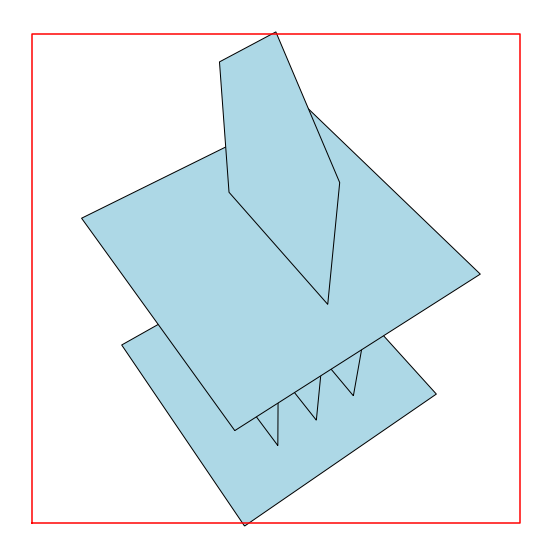

In [410]:
r = lambda d: d / 180. * np.pi
fov = r(35)
heading = r(55)
pitch = r(55)
cam_posn = np.array([0, -35, 4])
P, Rtc = cam.projection_matrix(
    fov, 5, heading, pitch, cam_posn)
geoms = [horsrf1, horsrf2, versrf1, versrf2, versrf3, versrf4]
xgeoms = cam.project_by_z(P, cam_posn, geoms, False)#[0:]

xgeoms = [mu.shapely_from_srf3d(srf) for srf in xgeoms]
df = gpd.GeoDataFrame({'geometry': xgeoms,
                       'color': np.arange(len(xgeoms))})
# Plot
f, a = plt.subplots(figsize=(10, 10))
df.plot(edgecolor='black', alpha=1, ax=a, facecolor='lightblue')
        #column='color')
b = cam.sensor_bounds(100)
a.plot(b[:,0], b[:,1], 'red')
a.grid(False)
_ = a.axis(False)

In [259]:
m = np.array([[9, 4, 4, 2], 
              [0, 2, 1, 3]])
#m = m
#np.argsort(m, order=('x, y'))
ii = np.lexsort((m[1], m[0]))
m.T[ii]



array([[2, 3],
       [4, 1],
       [4, 2],
       [9, 0]])